# Plane Waves


In the previous parts we have dealt with mechanics essentially. Even if we have described Brownian motion, this has been done by a particular type of Newtons equation of motion, it is much like mechanics. 
Now we would like to have a look at some examples from electromagnetic waves.  We will not solve the wave equation but look at some solution using the complex notion of the electric field. This shall train our use of complex numbers. The special solutions are the **plane wave** and the **spherical wave**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


### Equations

A plane wave is a solution of the homogeneous wave equation and is given in its complex form by 

\begin{equation}
E=E_{0}e^{i\vec{k}\cdot \vec{r}}e^{-i\omega t}
\end{equation}

where the two exponentials contain an spatial and a temporal phase. $E_{0}$ denotes the amplitude of the plane wave. The plane is defined by the shape of the wavefront which is given by $\vec{k}\cdot \vec{r}=const$, which is just the definition of a plane perpendicular to $\vec{k}$.

A wave is a physical quantity which oscillates in space and time. Its energy current density is related to the square magnitude of the amplitude. We will include in the following the spatial and the temporal phase. For plotting just the spatial variation of the electric field, you may just use the spatial part of the equation

\begin{equation}
E=E_{0}e^{i\vec{k}\cdot \vec{r}}
\end{equation}

But since we also want to see the wave propagate, we will directly include also the temporal dependence on our function. In all of the examples below we set the amplitude of the wave $E_{0}=1$. 

The propagation of the wave is defined by wavevector $\vec{k}$. In vacuum, the wavevector is just real valued

\begin{equation}
\vec{k}_{0}=
\begin{pmatrix}
k_{0x} \\
k_{0y}\\
k_{0z}\\
\end{pmatrix}
\end{equation}


The wavevector is providing the direction in which the wavefronts propagate. It is also proportional to the momentum of the wave, which will be important if we consider the refraction process a bit later. The magnitude of the wavevector is related to the wavelength $\lambda$. 

\begin{equation}
k_{0}=\frac{2\pi}{\lambda_{0}}=\frac{\omega}{c_{0}}
\end{equation}

At the same time, its magnitude is also given by the frequency of the light devided by the wave vector. The latter is called a dispersion relation. 

In a medium, the wavevector is by a factor of $n$ longer, where n is the refractive index. Since the refractive index may be a complex number, e.g. $n=\eta+i\kappa$, the wavevector can be imaginary as well. It is then given by 


\begin{equation}
\vec{k}=n\vec{k}_{0}=
\begin{pmatrix}
k_{x}^{\prime}+ik_{x}^{"} \\
k_{y}^{\prime}+ik_{y}^{"} \\
k_{z}^{\prime}+ik_{z}^{"} \\
\end{pmatrix}
\end{equation}

The complex number of the refractive index means, that there is some damping of the electromagnetic wave due to absorption, for example. 



The wavelength is then related to 

\begin{equation}
\Re(k)=\eta \frac{2\pi}{\lambda_{0}}
\end{equation}

and the imaginary part gives the damping

\begin{equation}
\Im(k)=\kappa \frac{2\pi}{\lambda_{0}}
\end{equation}



### Electric field

In [3]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

Lets have a look at waves and wave propagation. We want to create a wave, which has a wavelength of 532 nm in vacuum.

In [4]:
wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

It shall propagate along the z-direction and we wull have a look at the x-z plane.

In [5]:
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))

k=k0*vec

We can plot the electric field in the x-z plane by defining a grid of points (x,z). This is done by the *meshgrid* function of *numpy*. The meshgrid returns a 2-dimensional array for each coordinate. Have a look at the values in the meshgrid.

In [6]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

<ipython-input-6-01af4d56f4df>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


In the last lines, we defined an array of X,0,Z, where X and Z are already 2-dimensional array. This finally gives an array 3D vectors, which we can use to calculate the electric field at any point in space. If we want to plot the electric field, we have to calculate the real part of the complex values, as the electric field is a physical quantity, which is always real. There is not much to see for a plane wave in the intensity plot, as the intensity of a plane wave is constant in space. Yet, if you want to plot it, you have to calculate the magnitude square of the electric field, e.g.

\begin{equation}
I\propto |E|^{2}
\end{equation}

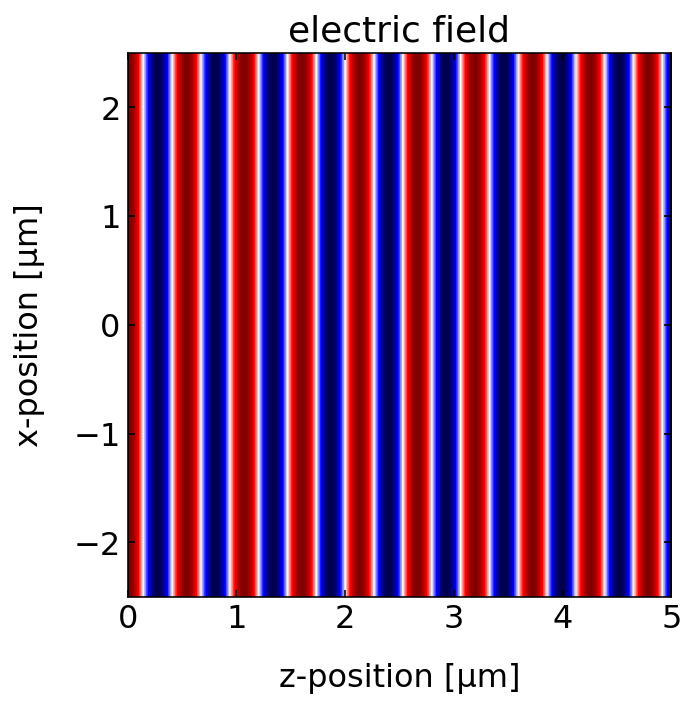

In [7]:
plt.figure(figsize=(12,5))
field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.title('electric field')
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')


plt.show()

### Plane wave propagation

The above graph shows a static snapshot of the plane wave at a time $t=0$. We know, however, that a plane wave is propagating in space and time. 
Since we know how to animate things, we may do that using the `ipycanvas` module.

In [8]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

<ipython-input-8-01af4d56f4df>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


In [18]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

To do the animation I use a little trick to get the same color map as in the matplotlib plotting. The function below uses the matplotlib color map `seismic` and the corresponding mapping of values with a given minimum `vmin` and maximum `vmax` value. The mapping is done in the animation function with `c=m.to_rgba(tmp)`.

In [10]:
#normalize the color map to a certain value range
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

#call the color map
cmap = cm.seismic

# do the mapping of values to color values.
m = cm.ScalarMappable(norm=norm, cmap=cmap)

This is our animation function, where I provide time and the wavevector as arguments, such that we may change both parameters easily.

In [11]:
def animate(k,time):
    for t in time:
        field=plane_wave(k,omega0,r,t)        
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
            #canvas.put_image_data(data*255,0,0)
        sleep(0.02)

In [12]:
eta=1
kappa=0
n=eta+kappa*1j

k=n*k0*vec
time= np.linspace(0,5e-14,500)
animate(k,time)

### Imaginary wave vector

If we now create a material, which has an imaginary part of the refractive index, we see that the amplitude decays and the wave fades.

<ipython-input-13-2ffd945eb8af>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


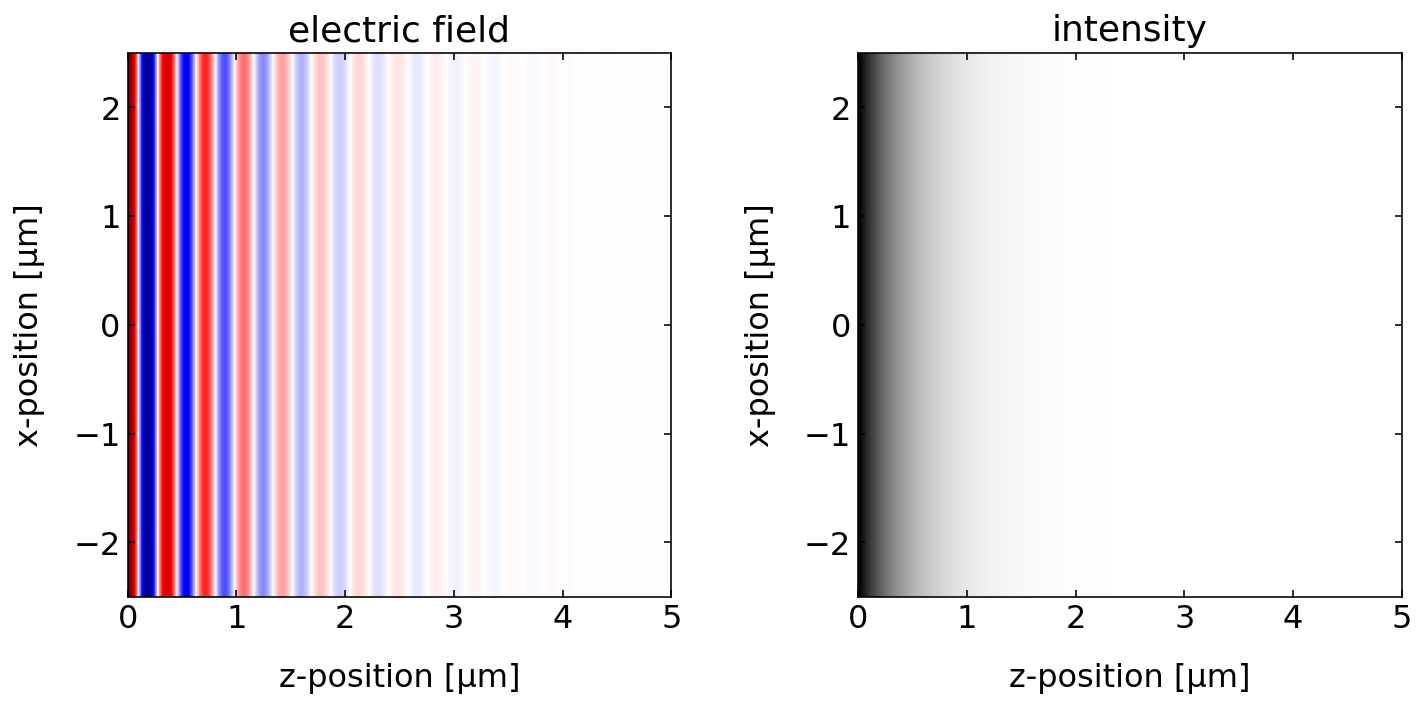

In [13]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])
plt.figure(figsize=(12,5))

eta=1.5
kappa=0.1
n=eta+kappa*1j
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k=n*k0*vec

field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.subplot(1,2,1)
plt.title('electric field')
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')

plt.subplot(1,2,2)
plt.title('intensity')
plt.imshow(np.abs(field.transpose())**2,extent=extent,cmap='gray_r')
plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')

plt.show()


The above plots show the electric field amplitude in the x-z plane. We may also have a look the field amplitude and intensity as a function of the z-position by chosing a single x-value. In the plot below, you may notice two things. The first is, that the wave decays exponentially with distance $z$. Intensity and field decay with different decay length. The field decays with $\exp(-\kappa*k_{0}z)$ while the intensity of cause decays twice as fast $\exp(-2\kappa*k_{0}z)$ due to the fact the the intensity is the square of the electric field.

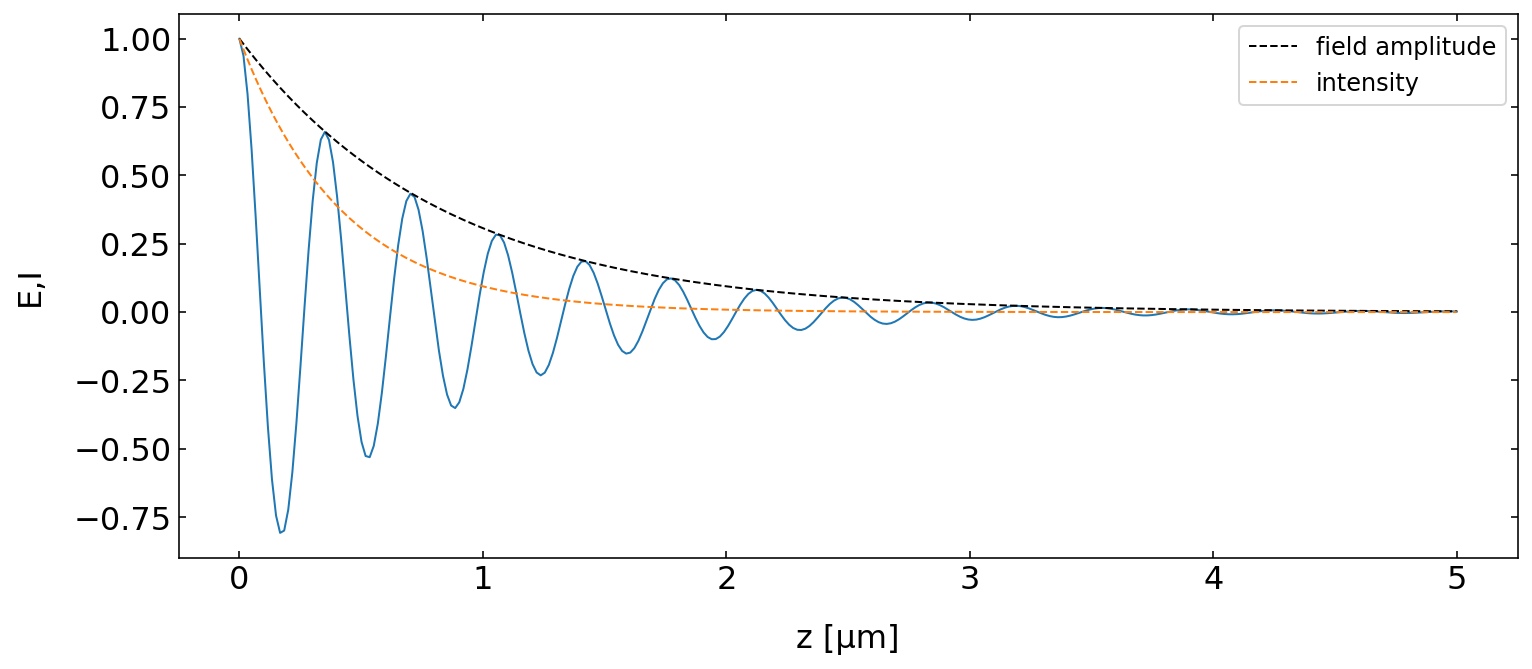

In [14]:
plt.figure(figsize=(12,5))
plt.plot(z*1e6,np.real(field[:,50]))
plt.plot(z*1e6,np.abs(field[:,50]),'k--', label='field amplitude')
plt.plot(z*1e6,np.abs(field[:,50])**2,'--',label='intensity')
plt.xlabel('z [µm]')
plt.ylabel('E,I')
plt.legend()
plt.show()

### Animation

Of course, we should not miss the animation. 

In [15]:
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [16]:
k=n*k0*vec
time= np.linspace(0,5e-14,500)
animate(k,time)

### Interference of two plane waves

It is not very difficult to calculate from the definitions we did above now the interference of two plane waves, which have different directions of the wavevector. The total field in space is then just the sum of the two fields

\begin{equation}
\vec{E}=\vec{E}_{1}+\vec{E}_{2}
\end{equation}

The interesting thing is now to look at the intensity which 

\begin{equation}
I\propto|\vec{E}|^2=|\vec{E}_{1}|^2+|\vec{E}_{2}|^2+ \vec{E}_{1}^{*}\vec{E}_{2}+\vec{E}_{2}^{*}\vec{E}_{1}
\end{equation}

<ipython-input-17-a8bb6edf401f>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r=np.array([X,0,Z])


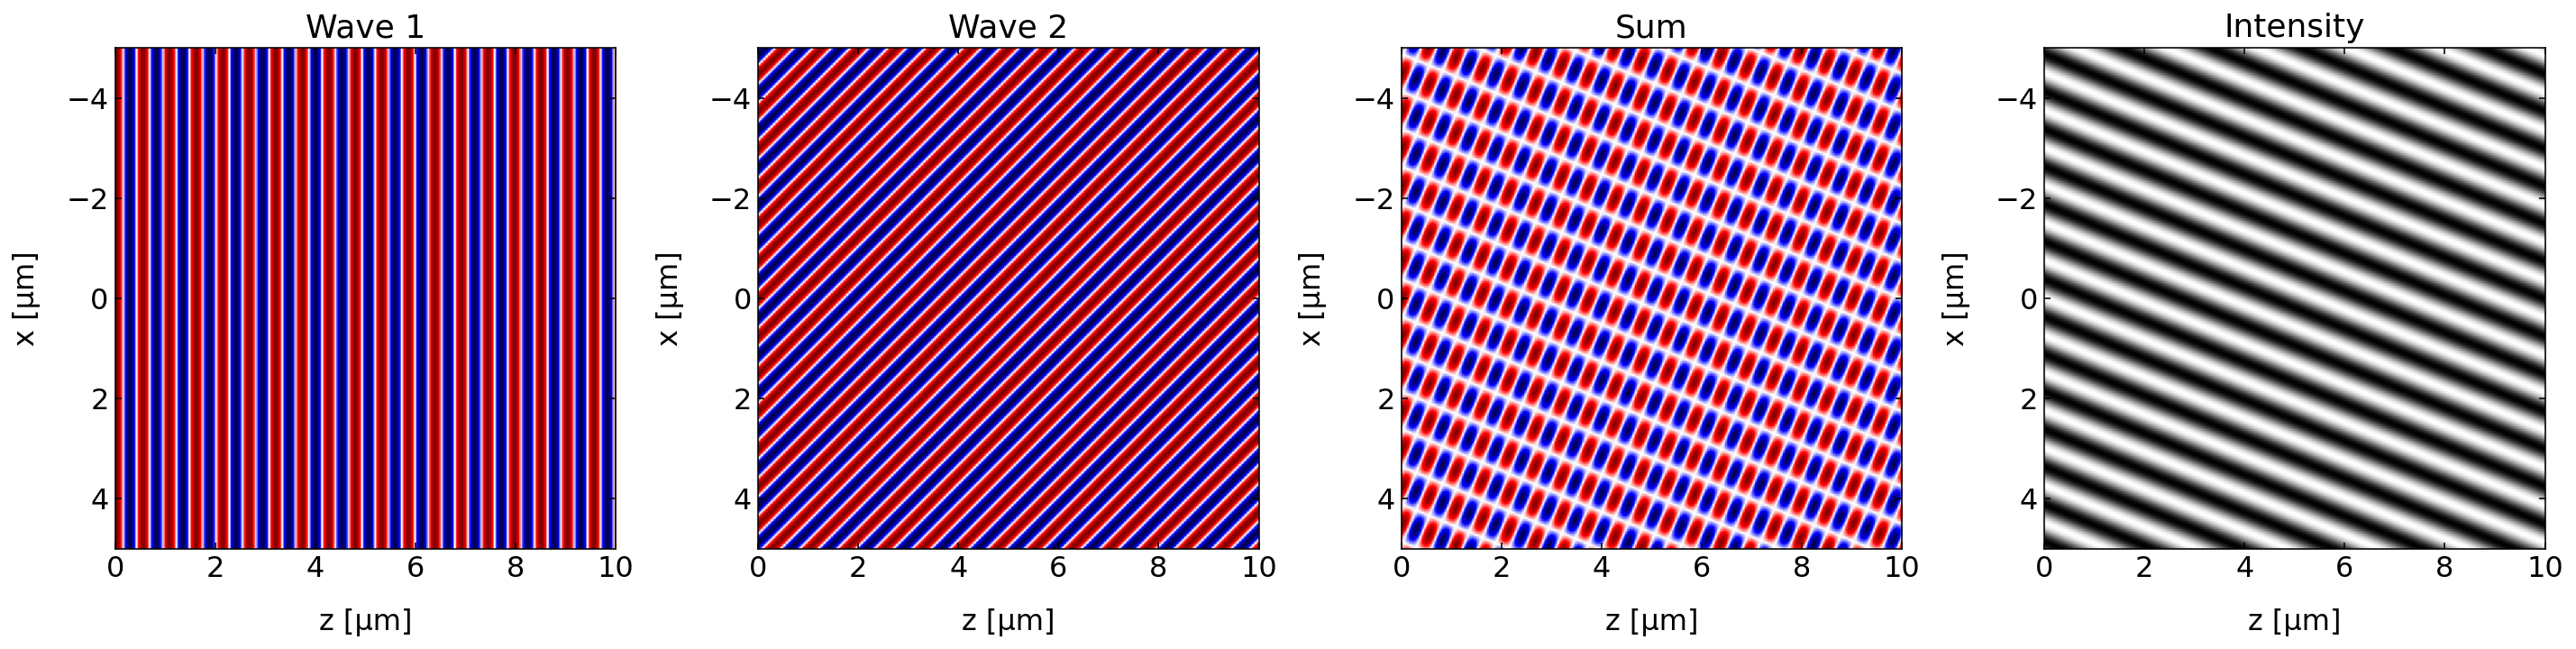

In [17]:
x=np.linspace(-5e-6,5e-6,200)
z=np.linspace(0,10e-6,200)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k1=k0*vec


vec=np.array([1,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))
k2=k0*vec


field1=plane_wave(k1,omega0,r,0)
field2=plane_wave(k2,omega0,r,0)
field=field1+field2

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.real(field1.transpose()),extent=extent,cmap='seismic')
plt.title('Wave 1')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')


plt.subplot(1,4,2)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.real(field2.transpose()),extent=extent,cmap='seismic')
plt.title('Wave 2')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,4,3)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent,cmap='seismic')
plt.title('Sum')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,4,4)
extent = np.min(z)*1e6, np.max(z)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.imshow(np.abs(field.transpose())**2,extent=extent,cmap='gray')
plt.title('Intensity')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.tight_layout()
plt.show()

While the field pattern still looks complicated, the intensity pattern is just a set of bright lines.

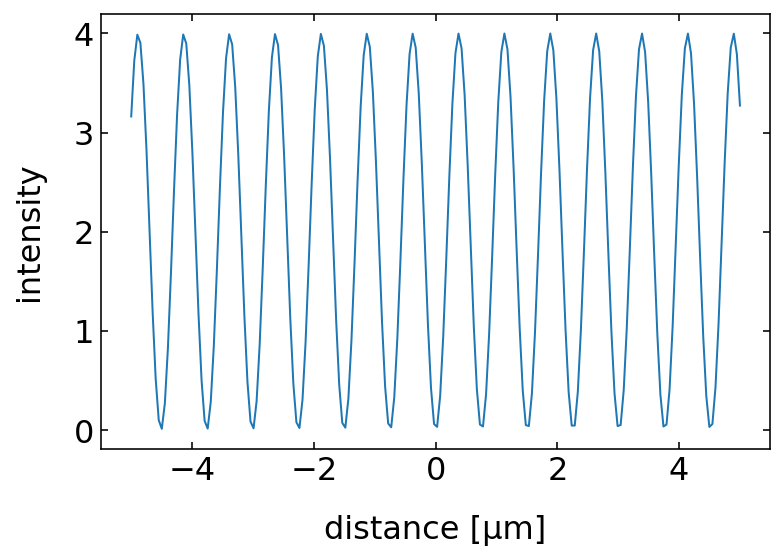

In [17]:
plt.plot(x*1e6,np.abs(field.transpose()[:,-1])**2)
plt.xlabel('distance [µm]')
plt.ylabel('intensity')
plt.show()

## Plane wave at a boundary

We want to go a bit further now and have a look at the wave at a boundary between vaccum and glass for example. At this boundary, the electromagnetic wave is reflected and refracted such that two new wavevectors arise. These are easily calculated by the law of reflection and the law of refraction. Besides that, also the amplitude of the waves change. To calculate the field we need the so-called Fresnel equations.

### Fresnel equations




When electromagnetic waves hit a boundary, they will be reflected and refracted. The amplitude of the reflected and refracted wave is determined by the refractive index of the two materials, the angles and the polarizations. For the latter we differentiate between a polarization in the incident plane (the p-polarization) and perpendicular to the incident plane (s-polarization).

![Fresnel](img/fresnel.png)

For each of the polarization we in general obtain a coeffcient for the reflection and one for the refraction. To make our calculation a bit simpler, we will assume only s-polarization. Then the two Fresnel coefficients are calculated as

\begin{equation}
\left( \frac{E_{0t}}{E_{0e}} \right)_s = t_s =\frac{2n_1 \cos{\alpha}}{n_1\cos{\alpha}+n_2\cos{\beta}}
\end{equation}


\begin{equation}
\left( \frac{E_{0r}}{E_{0e}} \right)_s = r_s =\frac{n_1\cos{\alpha}-n_2\cos{\beta}}{n_1\cos{\alpha}+n_2\cos{\beta}}
\end{equation}

where $\alpha$ and $\beta$ are the incident and refraction angles, respectively. Note that the Fresnel coefficients are for the amplitudes and can be negative to account for a phase jump by $\pi$. To obtain the coefficients for the intensities, one has to square the Fresnel coefficients.

To bring everything correctly together, we therefore have to define a number of things. We will need a function calculating the outgoing angle from Snells law. And we need at least two functions calculating the reflection and transmission coefficient for one polarization. We use the s-polarization, where the electric field is always parallel to the interface.

In [29]:
## snells law
def snell(n1,n2,alpha):
    tmp=n1*np.sin(alpha)/n2    
    return(np.arcsin(tmp,dtype=complex))

## reflection coefficient
def rs(n1,n2,alpha,beta):        
    return((n1*np.cos(alpha)-n2*np.cos(beta))/((n1*np.cos(alpha)+n2*np.cos(beta))))
    
## transmission coefficient    
def ts(n1,n2,alpha,beta):    
    return(2*n1*np.cos(alpha)/((n1*np.cos(alpha)+n2*np.cos(beta))))

With the definition of the Fresnel coefficients, we may now plot the reflection and the transmission coefficients. Note that the sum of reflection and transmission coefficients for the intensities have to add up to one if there is no absorption.

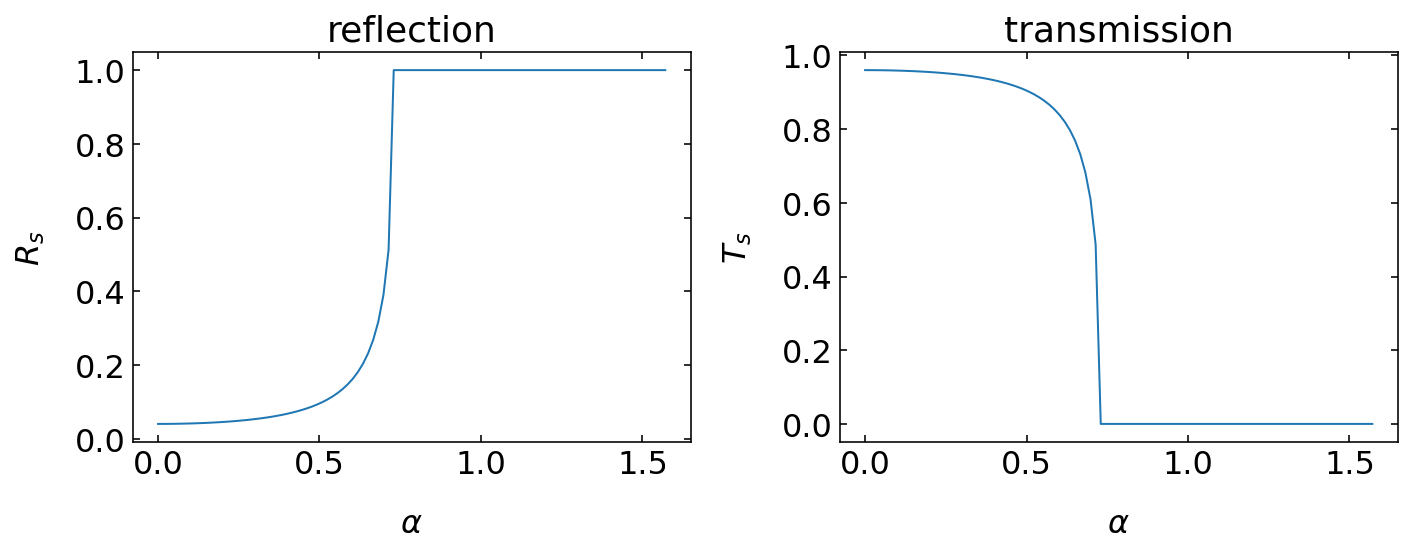

In [30]:
n1=1.5
n2=1
alpha=np.linspace(0,np.pi/2,100)
beta=snell(n1,n2,alpha)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('reflection')
plt.plot(alpha,np.abs(rs(n1,n2,alpha,beta))**2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$R_{s}$")
plt.subplot(1,2,2)
plt.title('transmission')
plt.plot(alpha,1-np.abs(rs(n1,n2,alpha,beta))**2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$T_{s}$")
plt.tight_layout()
plt.show()

### Incident wave

We want to study the electric fields and the intensities at various angles. The most interesting one, is a case where we have total internal reflection. This happens, if light is propagating from the higher refractive index to a lower refractive index. If we start in glass ($n_1=1.5$) and transmit to vacuum $n_2=1$, then at all angles above $\theta_{c}=\sin^{-1}(n_2/n_1)=41.810314895778596$ are total internally reflected. 

In [42]:
x=np.linspace(-5e-6,5e-6,500)
z1,z2=np.linspace(-5e-6,0,250),np.linspace(0,5e-6,250)
X,Z1=np.meshgrid(x,z1)


X,Z2=np.meshgrid(x,z2)
r1=np.array([X,0,Z1])
r2=np.array([X,0,Z2])

<ipython-input-42-e89899ec3040>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r1=np.array([X,0,Z1])
<ipython-input-42-e89899ec3040>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  r2=np.array([X,0,Z2])


We may now specify or calculate the corresponding wavevectors for an incident angle of $45^{\circ}$. In general all waves (reflect, refracted) have to match with their phase at the boundary. If the boundary is along the x-direction, we therefore have

\begin{equation}
k_{x,in}=k_{x,r}=k_{x,t}
\end{equation}

This fixes one component of all wavevectors in the plane. What is then missing, is the z-component of the wavevectors. The incident wavevector is providing $k_{z,in}$.

In [43]:
alpha=43*np.pi/180

In [44]:
vec=np.array([np.sin(alpha),0.,np.cos(alpha)])
k1=1.5*k0*vec
print(k1,'[1/m]')

[12082111.11503364        0.         12956477.9108035 ] [1/m]


### Reflected wave

For the reflected wave the z-component of the wavevector is just flipped in sign, e.g. $k_{z,r}=-k_{z,in}$.

In [45]:
k2=1.5*k0*vec
k2[2]=k2[2]*-1
print(k2,'[1/m]')

[ 12082111.11503364         0.         -12956477.9108035 ] [1/m]


### Refracted wave

The magnitude of the z-component of the transmitted wave can be obtained from the conservation of momentum. The momentum of the wave is proportional to the magnitude of the wavevector on both sides.

\begin{equation}
k_{1}^2=k_{2}^{2}
\end{equation}

which is, due to $k=nk_{0}$ the same as


\begin{equation}
n_{1}^2(k_{0x,in}^2+k_{0z,in}^{2})=n_2^2 (k_{0x,t}^{2}+k_{0z,t}^2)
\end{equation}

from which we get

\begin{equation}
k_{0z,t}=\pm \frac{1}{n_{1}}\sqrt{n_2^2 k_{0z,in}^2 -(n_{1}^2-n_{2}^2)k_{0x}^{2}}
\end{equation}

If we go from a medium with high refrective index to a lower one, the second term in the root may surpass the first one and the whole solution will become imaginary. 
The wave in the lower refractive index medium $n_{2}$ is then evanescent.

In [46]:
k3=np.zeros([3],dtype=complex)
k3[0]=k1[0]
k3[2]=np.sqrt(n2**2*k1[2]**2+(n2**2-n1**2)*k1[0]**2,dtype=complex)/n1

print(k3,'[1/m]')

[12082111.11503364      +0.j               0.              +0.j
        0.        +2547455.4966681j] [1/m]


The total field thus containes three components. In medium 1, the field consists of the incident and the reflected wave. In medium 2, we just have the transmitted wave, with a possible evanescent solution.

In [47]:
field=np.zeros([500,500],dtype=complex)
field1=plane_wave(k1,omega0,r1,0)
field2=plane_wave(k2,omega0,r1,0)
field3=plane_wave(k3,omega0,r2,0)

beta=snell(n1,n2,alpha)
r=rs(n1,n2,alpha,beta)
t=ts(n1,n2,alpha,beta)

field[0:250,:]=field1+r*field2
field[250:,:]=t*field3

The plots below show the electric field on the left side and the intensity on the right side. Interestingly, the intensity is that of a standing wave in medium 1, while it is just decaying in medium 2. Note that the electric field is oscillating along the interface in medium 2 but not at all in z-direction. This means that there is no energy transport along the z-direction anymore. 

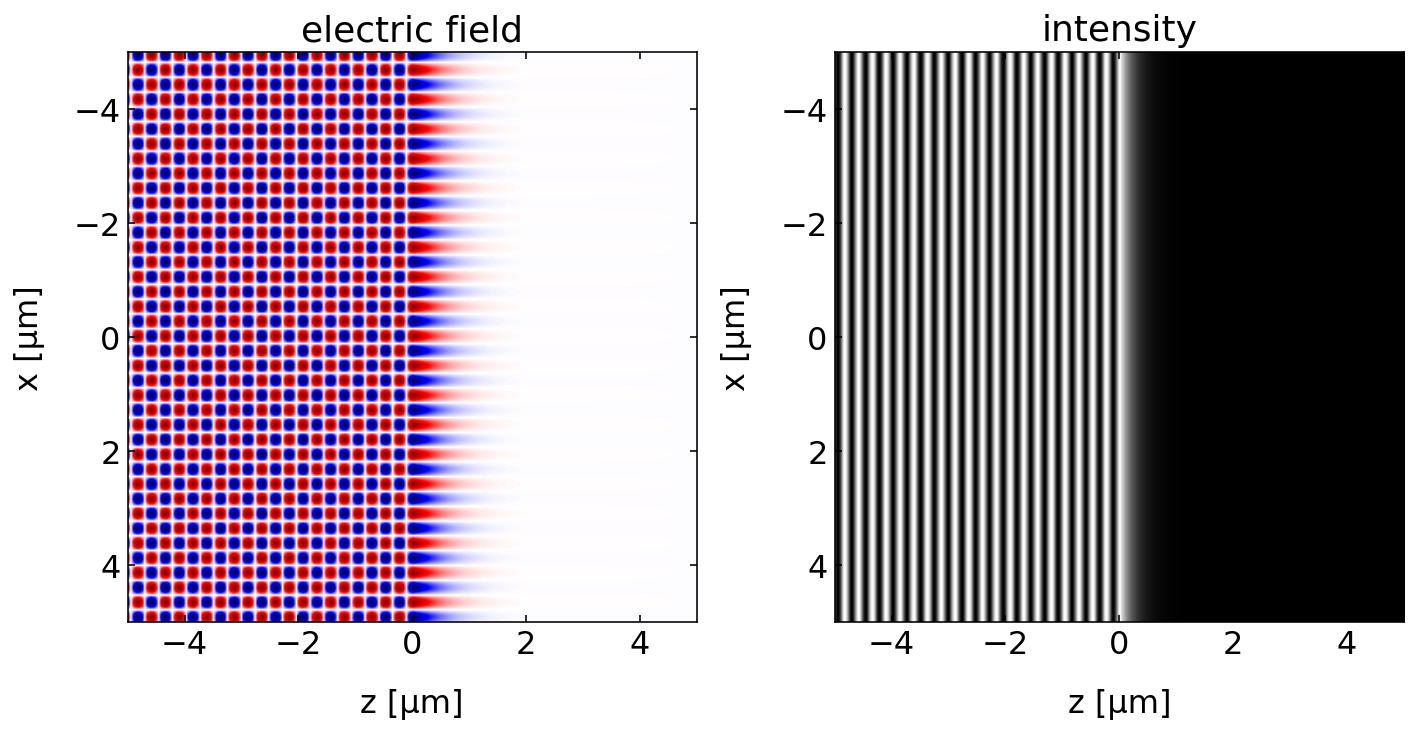

In [48]:
plt.figure(figsize=(10,5.5))
extent = np.min(z1)*1e6, np.max(z2)*1e6,np.max(x)*1e6, np.min(x)*1e6
plt.subplot(1,2,1)
plt.imshow(np.real(field.transpose()),extent=extent,cmap='seismic')
plt.title('electric field')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.subplot(1,2,2)
plt.imshow(np.abs(field.transpose())**2,extent=extent,cmap='gray')
plt.title('intensity')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.tight_layout()
plt.show()

We will also have a look ath the propagation of the wave yb defining our animation. 

In [19]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [20]:
def animate(k,time):
    for t in time:
        field=np.zeros([300,300],dtype=complex)
        field1=plane_wave(k1,omega0,r1,t)
        field2=plane_wave(k2,omega0,r1,t)
        field3=plane_wave(k3,omega0,r2,t)

        beta=snell(n1,n2,alpha)
        r=rs(n1,n2,alpha,beta)
        t=ts(n1,n2,alpha,beta)

        field[0:150,:]=field1+r*field2
        field[150:,:]=t*field3
        tmp=np.real(field.transpose())
        
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
        sleep(0.02)

In [21]:
time= np.linspace(0,1e-14,300)
animate(k,time)

NameError: name 'r1' is not defined

As it is apparent from our simulation, the wave is longitudinal in medium 2 at this angle. Try to modify the incident angles yourself to see if the wave becomes propagating in medium 2. 

In the last plot, we will have a look at the intensity in medium 1 and medium 2. What is nicely visible, is that the intensity decays in medium 2 with increasing distance. As compared to the absorbing case, there is not oscillation of the field in the z-direction, hence no energy transfer. Convince yourself that this is indeed an exponential decay by using the appropriate `semilog` plot.

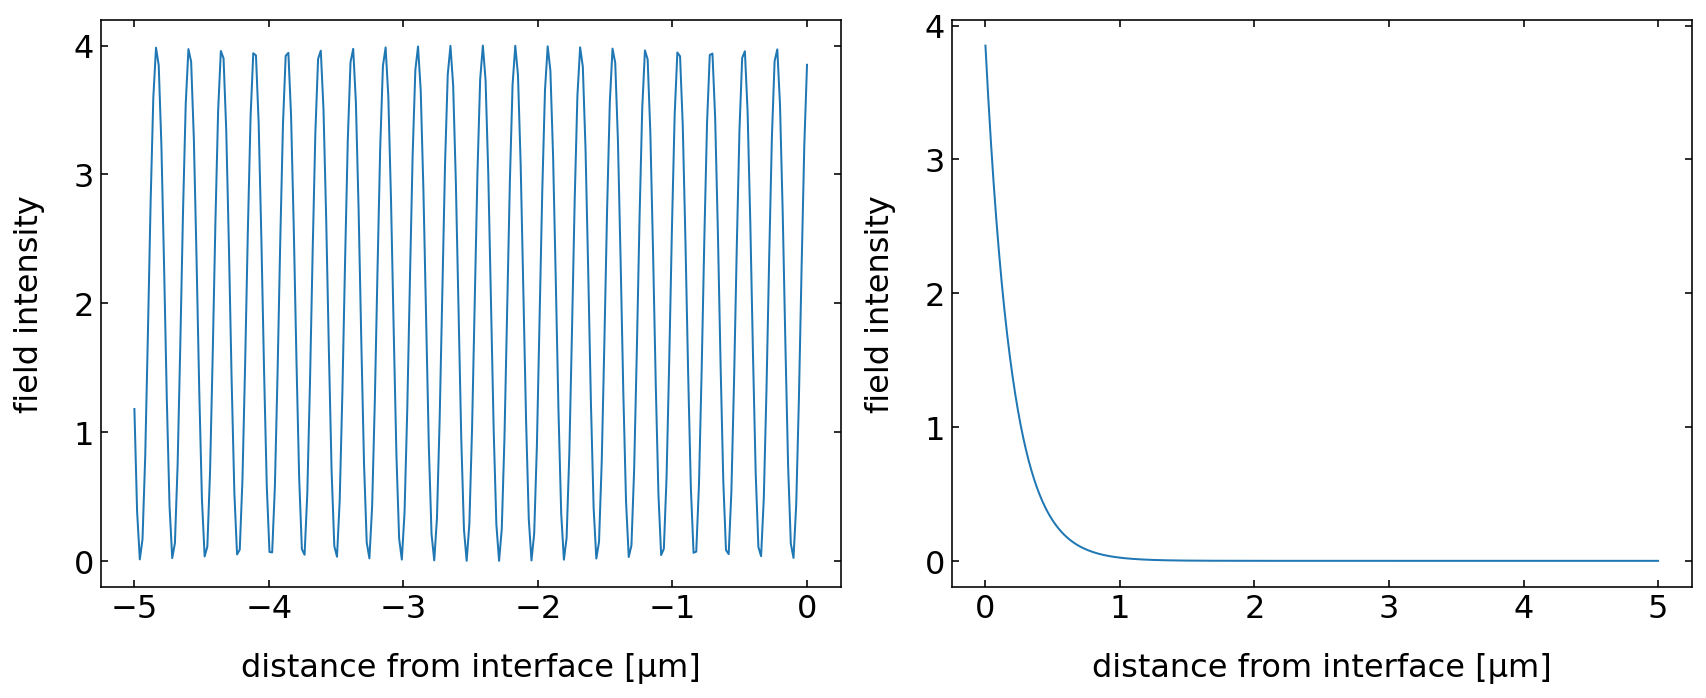

In [51]:
n=500
field=np.zeros([n,n],dtype=complex)
field1=plane_wave(k1,omega0,r1,0)
field2=plane_wave(k2,omega0,r1,0)
field3=plane_wave(k3,omega0,r2,0)

beta=snell(n1,n2,alpha)
r=rs(n1,n2,alpha,beta)
t=ts(n1,n2,alpha,beta)

field[0:int(n/2),:]=field1+r*field2
field[int(n/2):,:]=t*field3

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(z1*1e6,np.abs(field.transpose())[int(n/2),:int(n/2)]**2)
plt.xlabel('distance from interface [µm]')
plt.ylabel('field intensity')

plt.subplot(1,2,2)
plt.plot(z2*1e6,np.abs(field.transpose())[int(n/2),int(n/2):]**2)
plt.xlabel('distance from interface [µm]')
plt.ylabel('field intensity')

           
plt.tight_layout()           
plt.show()